# **Contexto**

**Projeto Ifood**

O objetivo de hoje é realizar uma análise exploratória com objetivo de identificar o perfil de clientes cadastrados nessa base e fazer correlações entre os dados que complementem o entendimento desse perfil. Esses resultados irão guiar algumas decisões sobre campanhas de marketing no aplicativo do Ifood, para aumentar o número de pedidos na plataforma e entender melhor os clientes.

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

1. Perfis de clientes
2. Preferências do produto
3. Sucessos/fracassos da campanha
4. Desempenho do canal

Definição de atributos do dataset:

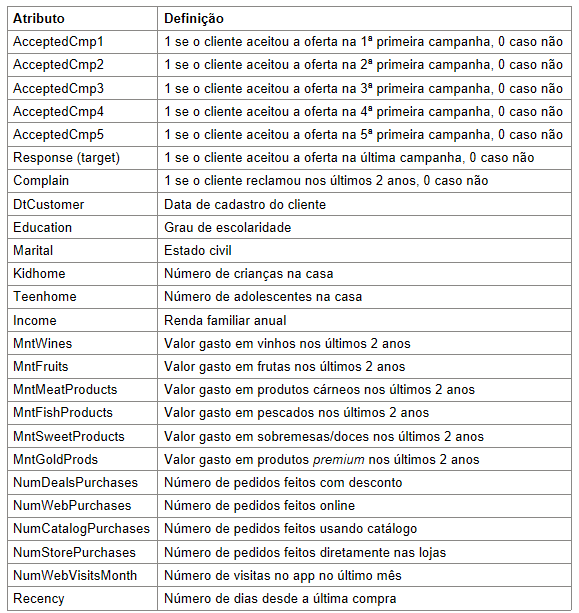



# **Ferramentas da análise**

In [ ]:
!pip install pandas #instalação da biblioteca pandas

In [2]:
#importação de ibliotecas de pyton importantes para operações matemáticas e transformação dos dados
import pandas as pd #manipular os dados
import seaborn as sns #manipular os gráficos
import numpy as np #biblioteca de operações matemáticas
import matplotlib.pyplot as plt #manipular gráficos principalmente boxplot

# **Análise Exploratória dos dados**

Etapa de exploração univariada inicial para entender os tipos de variável, investigar valores únicos, verificar valores ausentes ou nulos, verificar a qualidade dos dados e analisar a distribuição das variáveis categóricas e numéricas. **Essa etapa é fundamental para a organização dos dados e qualidade das análises subsequentes.**

In [3]:
#importação da base de dados para o notebook, isso é feito com o pandas, que vai ler o arquivo csv.
df= pd.read_csv("mkt_data.csv")

In [4]:
df #mostra o dataframe importado, nesse caso temos 2205 linhas e 44 colunas

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


## **Verificação de dados duplicados**

In [5]:
#somando os duplicados da base: aqui conseguimos verificar a soma total de dados duplicados
df.duplicated().sum()

np.int64(0)

Não há dados duplicados.

##**Verificação de dados nulos**

In [6]:
#para informações do dataframe DF, como tipos de dados e contagem de nulos, usamos o comando info no df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

Todas as colunas são numéricas, com exceção da 40 e 41 que referem-se a marital_status e education_level que são dados categóricos

Aqui é possível verificar, também, a quantidade de dados não nulos de cada coluna. Na coluna "Non-null Count" algumas colunas possuem total de registros igual a 2205 (total de linhas do dataframe) enquanto outras possuem menos, caso da coluna "marital_Divorced", por exemplo.

In [7]:
#o código irá acessar o dataframe, verificar todas as colunas e fazer um soma de nulos.
#se rodar só isnull, ele irá retornar com o dataframe preenchido com falso e verdadeiro nas células. Se tiver vazio, vai aparecer TRUE e se tiver preenchido, vai aparecer FALSE.
#o comando sum irá somar os verdadeiros e retornará com a quantidade de vazios
df.isnull().sum()

,0
Unnamed: 0,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0


Temos nulos na base, nas colunas 27 a 36:

marital_Divorced        
marital_Married         
marital_Single          
marital_Together        
marital_Widow           
education_2n Cycle      
education_Basic         
education_Graduation    
education_Master        
education_PhD           

Os nulos indicados significam que a pessoa não tem aquela determinada característica. Notem que essas colunas só tem nulos ou um outro determinado valor. Por exemplo, qual estado civil e nível educacional. **Nas colunas descritas temos dados em branco, porém estão em branco porque deve ser marcado como sim ou não de acordo com a informação de cada cliente. Então esses nulos não irão afetar os resultados, mas podemos tratar a base para não deixar células em branco e facilitar a nossa análise.**

In [8]:
#contando as ocorrências de um valor na coluna education_PhD: o .value_counts() conta apenas os registros não nulos.
df.education_PhD.value_counts()

,count
education_PhD,
5.0,476


A coluna education_PhD só tem o número 5.0, que aparece 476 vezes. O restante é nulo. Isso é um ótimo indício que o campo em branco significa que o cliente não tem aquela característica. Portanto, essas colunas podem se tornar um booleano, sendo 1 se possui e 0 se não possui.

In [9]:
#selecionando colunas com nulos
colunas_com_nulos = ["marital_Divorced"
, "marital_Married"
, "marital_Single"
, "marital_Together"
, "marital_Widow"
, "education_2n Cycle"
, "education_Basic"
, "education_Graduation"
, "education_Master"
, "education_PhD"]

In [10]:
#criando colunas booelanas a partir das colunas com nulos

for item in colunas_com_nulos:
  df["booleano"+str(item)] = np.where(df[item].isnull(), 0, 1) #se for nulo, substituimos por 0, caso contrário substituimos por 1

In [11]:
#exibição do dataframe após criação de colunas booleanas
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,booleanomarital_Divorced,booleanomarital_Married,booleanomarital_Single,booleanomarital_Together,booleanomarital_Widow,booleanoeducation_2n Cycle,booleanoeducation_Basic,booleanoeducation_Graduation,booleanoeducation_Master,booleanoeducation_PhD
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,0,0,0,0,1,0,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,1,0,0,0,1,0,0
3,3,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,1,0,0,0,1,0,0
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,0,1,0,0,0,0,0,1,0,0
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,1,0,0,0,0,0,1
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,1,0,0,0,0,0,0,1,0,0
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,1,0,0,0,0,1,0


In [12]:
#contagem dos campos nulos após criação de colunas booleanas - temos agora todas as colunas de características de clientes sem nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2205 non-null   int64  
 1   Income                        2205 non-null   float64
 2   Kidhome                       2205 non-null   int64  
 3   Teenhome                      2205 non-null   int64  
 4   Recency                       2205 non-null   int64  
 5   MntWines                      2205 non-null   int64  
 6   MntFruits                     2205 non-null   int64  
 7   MntMeatProducts               2205 non-null   int64  
 8   MntFishProducts               2205 non-null   int64  
 9   MntSweetProducts              2205 non-null   int64  
 10  MntGoldProds                  2205 non-null   int64  
 11  NumDealsPurchases             2205 non-null   int64  
 12  NumWebPurchases               2205 non-null   int64  
 13  Num

#**Perfil dos Clientes**

##**Estatística Descritiva** 📊

Principais estatísticas das colunas numéricas de interesse:

In [13]:
# utilizando o .describe() para cálculo das medidas principais

df[["kids", "Income", "expenses"]].describe()

,kids,Income,expenses
count,2205.000000,2205.000000,2205.000000
mean,0.948753,51622.094785,562.764626
std,0.749231,20713.063826,575.936911
min,0.000000,1730.000000,4.000000
25%,0.000000,35196.000000,56.000000
50%,1.000000,51287.000000,343.000000
75%,1.000000,68281.000000,964.000000
max,3.000000,113734.000000,2491.000000


*Kids* (número de filhos) : A média está próxima da mediana, indicando que em média as pessoas tem entre 0 e 1 filho e a mediana (50%) confirma que metade das famílias em até 1 filhos. **A distribuição é bem concentrada, já que 75% têm até 1 filho. Clientes com 2 ou 3 filhos são minoria.**

*Expenses* (valor gasto na plataforma): Vemos que o desvio padrão (std) está bastante elevado e quase igual ao valor médio (mean). A mediana (50%) é de 343, bem menor que a média 562, e 75% dos clientes gastam até 964 reais. **Isso sugere que a maioria das famílias gasta pouco com compras no aplicativo, mas existe um grupo reduzido com gastos muito altos e isso distorce o gasto médio.**

*Income* (renda anual): A média de 51.622,00 está próxima da mediana 51.287,00, o que sugere uma distribuição de renda relativamente simétrica entre os clientes.  


###**Income (renda anual)**

Calculamos o coeficiente de variação (CV) da coluna *Income* para complementar. Essa medida fornece uma compreensão relativa da variabilidade dos dados, que significa que quanto mais próximo de 1 (100%) mais dispersos os seus dados são em relação à média. O CV da variável Income é de 0,4 / 40%, que indica alguma dispersão mas sem grande distorsão.

**Para entender melhor a renda, vamos visualizar os dados em um boxplot e histograma a seguir.**

In [14]:
#coeficiente de variação
df["Income"].std()/df["Income"].mean()

np.float64(0.4012441554786958)

<Axes: >

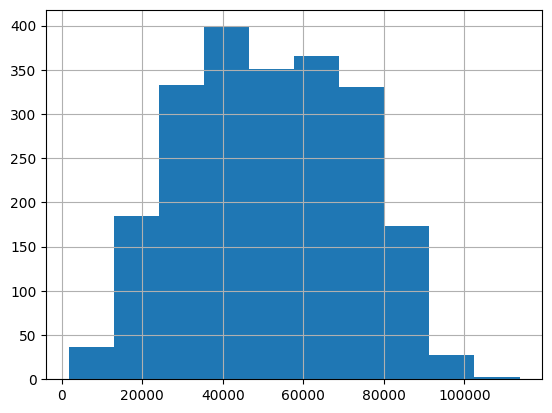

In [15]:
#histograma
df["Income"].hist()

<Axes: ylabel='Income'>

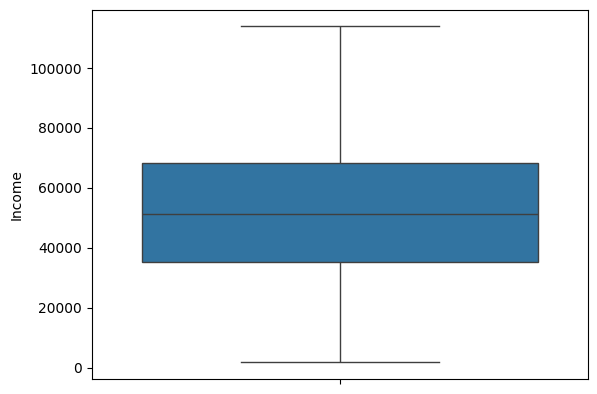

In [16]:
#boxplot
sns.boxplot(df["Income"])

In [17]:
df["Income"].skew()

np.float64(0.013164263414417078)

**Algumas poucas pessoas ganham pouco e algumas poucas ganham muito, não há outliers e a renda tem uma distribuição relativamente simétrica, sem grandes distorções.**

###**Grau de Escolaridade**

A maioria dos clientes possui educação de nível superior (graduação). Poucos clientes concluíram somente o nível básico. **No geral, podemos dizer que os clientes tem níveis superiores de educação.** Essa informação pode ser verificada no gráfico de barras a seguir.

<Axes: xlabel='education_level', ylabel='count'>

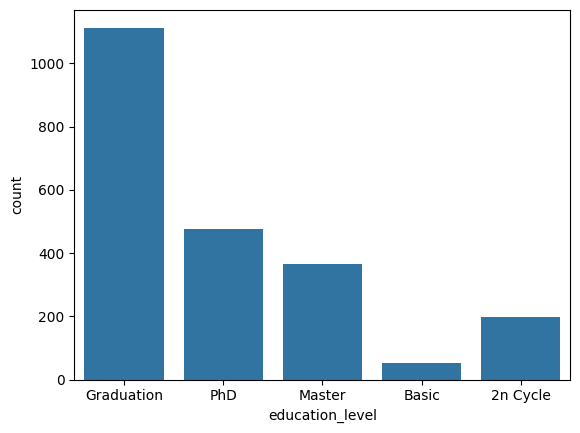

In [18]:
sns.countplot(x=df["education_level"])

###**Estado Civil**

**Analisando a coluna *marital_status*, temos que a maior parte dos clientes são casados ou moram juntos.** Poucos clientes são divorciados ou viúvos.

<Axes: xlabel='marital_status', ylabel='count'>

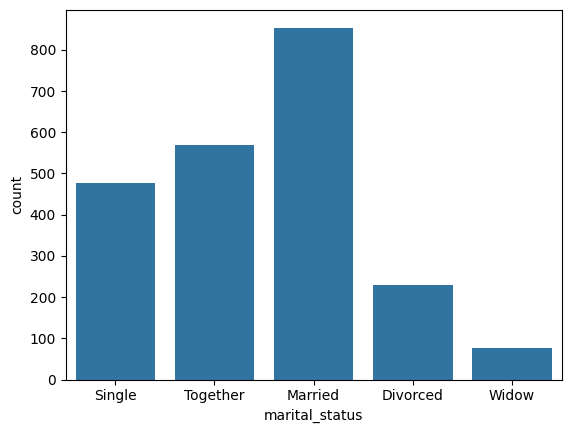

In [19]:
sns.countplot(x=df["marital_status"])

##**Correlação entre os dados** ↔️

###**Estado civil x número de filhos**

Todos os gupos tem perfil parecido, com maioria entre 0 e 1 filho. O grupo Divorced(divorciado) tem a distribuição mais concentrada, com quase todos com 1 filho. 3 filhos já é considerado um valor *outlier*.

In [20]:
df.groupby(["marital_status"])["kids"].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,230.0,1.008696,0.741716,0.0,1.0,1.0,1.0,3.0
Married,854.0,0.967213,0.732019,0.0,0.0,1.0,1.0,3.0
Single,477.0,0.859539,0.777289,0.0,0.0,1.0,1.0,3.0
Together,568.0,0.980634,0.749823,0.0,0.0,1.0,1.0,3.0
Widow,76.0,0.881579,0.747745,0.0,0.0,1.0,1.0,2.0


<Axes: xlabel='marital_status', ylabel='kids'>

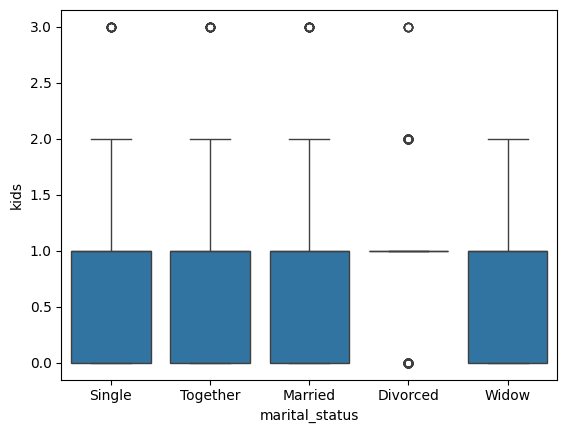

In [21]:
sns.boxplot(x='marital_status', y='kids', data=df)

In [22]:
#calculando a mediana de filhos por status de união
df.groupby("marital_status")["kids"].median()

,kids
marital_status,
Divorced,1.0
Married,1.0
Single,1.0
Together,1.0
Widow,1.0


###**Gastos na plataforma x número de filhos**

Vemos que famílias sem filhos são as que mais gastam, em média. Conforme aumenta o número de filhos, as despesas medianas diminuem bastante (de aprox. 1100 sem filhos para aprox. 100 com 2 ou 3 filhos). Apesar disso, nas famílias com 1 a 3 filhos temos outliers, ou seja, poucas famílias com filhos que gastam muito acima da média de seu grupo.

<Axes: xlabel='kids', ylabel='expenses'>

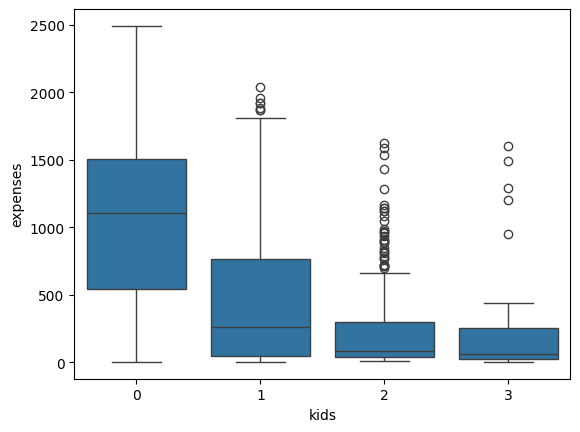

In [23]:
sns.boxplot(x='kids', y='expenses', data=df)

In [24]:
#Vamos calcular a média de expenses por quantidade de filhos
df.groupby("kids")["expenses"].mean()

,expenses
kids,
0,1041.207006
1,434.530576
2,221.568675
3,237.380000


In [25]:
#Vamos calcular a mediana de expenses por quantidade de filhos
df.groupby("kids")["expenses"].median()

,expenses
kids,
0,1106.5
1,264.0
2,84.0
3,62.0


###**Renda anual x gastos na plataforma**

Aparentemente existe uma correlação diretamente proporcional, em que pessoas que tem maior renda também são as que gastam mais. A correlação de pearson no valor de 0,82 indica que a medida que uma variável aumentar, a outra também tende fortemente a crescer.

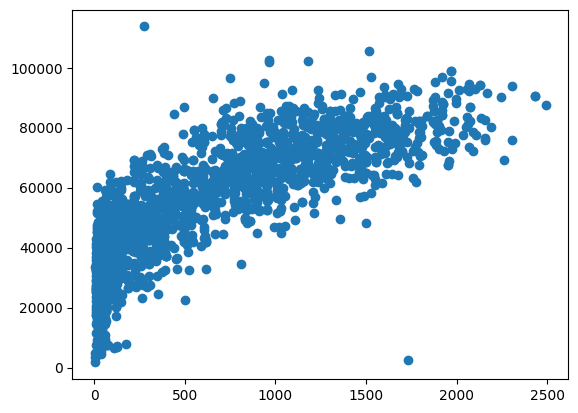

In [26]:
#gráfico de dispersão para comparar income no eixo y e gastos na plataforma no eixo x
plt.scatter(df["expenses"], df["Income"])
plt.show()

In [ ]:
#correlação de pearson
df["expenses"].corr(df["Income"])

np.float64(0.8230660021398378)

###**Renda anual x número de filhos**

Notamos que as famílias sem filhos possuem maior renda, mas com uma grande dispersão. Também há uma tendência decrescente entre renda e filhos, em que à medida que o número de filhos aumenta, a renda mediana diminui. Famílias com filhos mostram menor renda média e menor variação.

<Axes: xlabel='kids', ylabel='Income'>

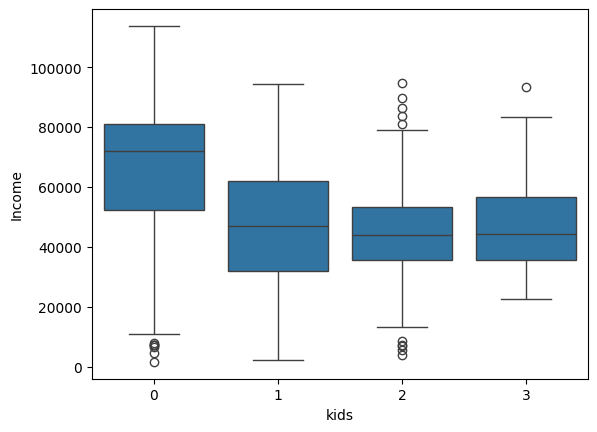

In [33]:
sns.boxplot(x='kids', y='Income', data=df)

# Sumário

#### Carregar e Examinar Dados

1. **Ler um arquivo CSV:**
   ```python
   df = pd.read_csv("mkt_data.csv")
   ```

2. **Verificar tamanho do DataFrame (linhas x colunas):**
   ```python
   df.shape
   ```

3. **Verificar o tipo de cada coluna:**
   ```python
   df.info()
   ```

4. **Verificar o nome das colunas do DataFrame:**
   ```python
   df.columns
   ```

5. **Exibir principais estatísticas:**
   ```python
   df.describe()
   ```

#### Verificar e Manipular Dados

6. **Verificar a soma total de duplicados de cada coluna:**
   ```python
   df.duplicated().sum()
   ```

7. **Exibir o tipo de dados e retornar o nome da coluna:**
   ```python
   df.select_dtypes(include=lista_tipos_dados).columns
   ```

8. **Usar a função where para encontrar os valores nulos e substituí-los:**
   ```python
   np.where(df[nome_coluna].isnull(), 0, 1)
   ```

#### Análise Estatística

9. **Cálculo do Coeficiente de Variação:**
   ```python
   df["Income"].std() / df["Income"].mean()
   ```

10. **Cálculo do Skewness (Assimetria):**
    ```python
    df["nome_coluna"].skew()
    ```

11. **Usar o groupby para agrupar os dados de acordo com a coluna_1:**
    ```python
    df.groupby(["coluna_1"])
    ```

#### Visualização de Dados

12. **Plotar Histograma:**
    ```python
    df['nome_coluna'].hist()
    ```

13. **Plotar Boxplot:**
    ```python
    sns.boxplot(df["nome_coluna"])
    ```

14. **Plotar Gráfico de Dispersão:**
    ```python
    plt.scatter(df["coluna1"], df["coluna2"])
    plt.show()
    ```